## ALE plots

In [1]:
import sys
sys.path

['c:\\D_Drive\\Indra\\github_projects\\explainability\\PyALE-master\\decoding',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\python311.zip',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\DLLs',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01',
 '',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\Pythonwin']

In [2]:
alepath="C:\D_Drive\Indra\github_projects\explainability\PyALE-master"
sys.path.insert(0,alepath)
sys.path

['C:\\D_Drive\\Indra\\github_projects\\explainability\\PyALE-master',
 'c:\\D_Drive\\Indra\\github_projects\\explainability\\PyALE-master\\decoding',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\python311.zip',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\DLLs',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01',
 '',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\Pythonwin']

In [3]:
from PyALE import ale, ALE_1D_IS, ALE_1D, ALE_2D, lib

In [4]:
ALE_1D_IS.fn_check()

2024-04-26 04:24:36.653 | INFO     | PyALE._src.ALE_1D_IS:fn_check:18 - In the fn_check method
2024-04-26 04:24:36.653 | DEBUG    | PyALE._src.ALE_1D_IS:fn_check:20 - A debug message.
2024-04-26 04:24:36.660 | INFO     | PyALE._src.ALE_1D_IS:fn_check:21 - An info message.
2024-04-26 04:24:36.661 | SUCCESS  | PyALE._src.ALE_1D_IS:fn_check:22 - A success message.
2024-04-26 04:24:36.662 | WARNING  | PyALE._src.ALE_1D_IS:fn_check:23 - A warning message.
2024-04-26 04:24:36.662 | ERROR    | PyALE._src.ALE_1D_IS:fn_check:24 - An error message.
2024-04-26 04:24:36.664 | CRITICAL | PyALE._src.ALE_1D_IS:fn_check:25 - A critical message.


# PyALE: Usage examples

In [5]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

## Prepare Data

In [6]:
# get the raw diamond data (from R's ggplot2)
# dat_diamonds = pd.read_csv(
#     "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"
# )
dat_diamonds = pd.read_csv(".\Input_Data\diamonds.csv")
dat_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
X_raw = dat_diamonds.loc[:, ~dat_diamonds.columns.str.contains("price")].copy()
y = dat_diamonds["price"].copy()

In [8]:
X = X_raw.copy()
# convert the three text columns to ordered categoricals
X["cut"] = X["cut"].astype(
    pd.api.types.CategoricalDtype(
        categories=["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True
    )
)
X["clarity"] = X["clarity"].astype(
    pd.api.types.CategoricalDtype(
        categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
        ordered=True,
    )
)

In [9]:
# use the codes of each categorical as a numeric encoding for the feature
X["cut_code"] = X["cut"].cat.codes
X["clarity_code"] = X["clarity"].cat.codes

In [10]:
# fit a one-hot-encoder before the function
# it is important to use a one-hot-encoder, that is fitted with all possible
# categories in the feature.
one_hot_encoder = OneHotEncoder().fit(X[["color"]])

def onehot_encode(feat, ohe=one_hot_encoder):
    col_names = ohe.categories_[0]
    feat_coded = pd.DataFrame(ohe.transform(feat).toarray())
    feat_coded.columns = col_names
    return feat_coded

In [11]:
coded_feature = onehot_encode(X[["color"]])
X = pd.concat([X, coded_feature], axis=1)

In [12]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_code,clarity_code,D,E,F,G,H,I,J
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,3,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,1,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,3,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
features = ["carat", "cut_code", "clarity_code", "depth", "table", "x", "y", "z"]
features = features + coded_feature.columns.to_list()

In [14]:
X[features].head()

,carat,cut_code,clarity_code,depth,table,x,y,z,D,E,F,G,H,I,J
0,0.23,4,1,61.5,55.0,3.95,3.98,2.43,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,3,3,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,1,1,63.3,58.0,4.34,4.35,2.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Fit the model

In [15]:
model = RandomForestRegressor(random_state=1345)
model.fit(X[features], y)

RandomForestRegressor(random_state=1345)

### Discrete feature

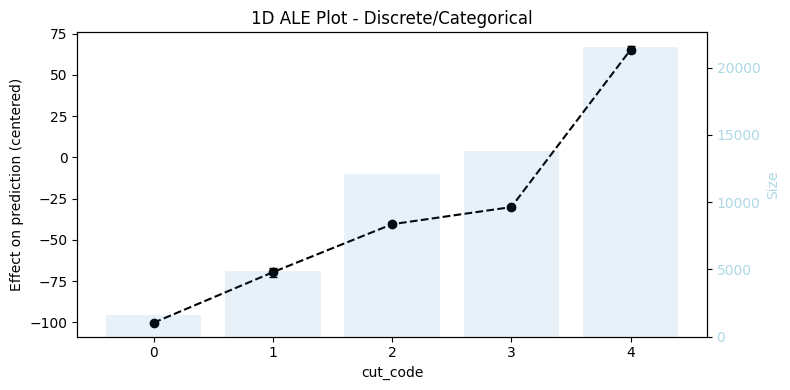

In [16]:
## 1D - discrete
ale_eff = ale(X=X[features], model=model, feature=["cut_code"])

In [17]:
X["cut_code"].value_counts()

cut_code
4    21551
3    13791
2    12082
1     4906
0     1610
Name: count, dtype: int64

In [18]:
ALE_1D.aleplot_1D_discrete(X=X[features], model=model, feature='cut_code', include_CI=True, C=0.95)

,eff,size,lowerCI_95%,upperCI_95%
cut_code,,,,
0,-100.172437,1610,NaN,NaN
1,-69.551269,4906,-72.181457,-66.921081
2,-40.464307,12082,-41.734123,-39.194491
3,-30.086004,13791,-31.129829,-29.042180
4,65.254605,21551,63.078812,67.430398


In [19]:
ALE_1D_IS.aleplot_1D_discrete(X=X[features], model=model, feature='cut_code', include_CI=True, C=0.95, verbose=True)

2024-04-26 04:25:24.054 | INFO     | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:198 - Starting of aleplot_1D_discrete
2024-04-26 04:25:24.055 | WARNING  | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:199 - Start: Data types check of the function
2024-04-26 04:25:24.058 | WARNING  | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:206 - End: Data types check of the function
2024-04-26 04:25:24.059 | DEBUG    | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:209 - type(groups):<class 'numpy.ndarray'>
2024-04-26 04:25:24.061 | DEBUG    | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:210 - Count of unique values: 5
2024-04-26 04:25:24.064 | DEBUG    | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:212 - len(groups):5, Unique values of groups:[0 1 2 3 4]
2024-04-26 04:25:24.065 | DEBUG    | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:215 - len(groups_codes):5, Unique values of groups_codes:{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
2024-04-26 04:25:24.069 | DEBUG    | PyALE._src.ALE_1D_IS:aleplot_1D_discrete:217 - type(feature_codes):<c

,eff,size,lowerCI_95%,upperCI_95%
cut_code,,,,
0,-100.172437,1610,NaN,NaN
1,-69.551269,4906,-72.181457,-66.921081
2,-40.464307,12082,-41.734123,-39.194491
3,-30.086004,13791,-31.129829,-29.042180
4,65.254605,21551,63.078812,67.430398
